In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
def calc_sec(time):
    hms = time.split(':')
    hms = [float(x) for x in hms]
    sec = hms[2] + hms[1]*60 + hms[0]*3600
    sec = round(sec,3)
    return sec

In [173]:
def calc_ts(sec):
    ts = ''
    hr = int(sec/3600)
    mn = int((sec - (hr*3600))/60)
    sc = sec - (hr*3600) - (mn*60)
    sc = round(sc,3)
    ts += str(hr) + ':' + str(mn) + ':' + str(sc)
    # print(ts)
    return ts

In [174]:
def calc_t_period(dates,secs):
    t_period = []
    
    start_sec = secs[0]
    prev_sec = secs[0]
    prev_date = dates[0]

    for i in range(len(secs)):
        curr_sec = secs[i]
        diff_sec = curr_sec - prev_sec
        curr_date = dates[i]
        
        if((diff_sec>3.0) and (curr_date==prev_date)):
            t_period.append([curr_date,start_sec,prev_sec])
            start_sec = curr_sec
        elif(curr_date!=prev_date):
            t_period.append([prev_date,start_sec,prev_sec])
            start_sec = curr_sec
            prev_date = curr_date
        elif(i==len(secs)-1):
            t_period.append([curr_date,start_sec,curr_sec])

        prev_sec = curr_sec
    
    return t_period

In [175]:
def equation_bai(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    diff_std = std_i**2 - std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
    diff_std_ = std_i**2

    all_std.append(diff_std)
    
    all_std = np.array(all_std)
    
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

In [176]:
std_i_bar = [0.00349329,0.00465817,0.00543154]
std_i_bar = np.array(std_i_bar)

In [177]:
filepath = 'SmartwatchData/raw_data/log_acc_19-12-18_LH.csv'
df = pd.read_csv(filepath)
filtered = [i for i in df['timestamp'] if i[:10]=='2018-12-19' and calc_sec(i[11:])>calc_sec('16:19:23') 
            and calc_sec(i[11:])<=calc_sec('16:24:13')]

df_filt = df[df['timestamp'].isin(filtered)]
df_filt = df_filt.reset_index(drop=True)

cols = ['timestamp','x','y','z']
df_filt = df_filt[cols]

df_filt

,timestamp,x,y,z
0,2018-12-19 16:19:23.066,-2.227805,-8.297106,4.837484
1,2018-12-19 16:19:23.23,-2.251747,-8.292317,4.904522
2,2018-12-19 16:19:23.392,-2.218228,-8.373720,4.813542
3,2018-12-19 16:19:23.554,-2.208651,-8.349778,4.789600
4,2018-12-19 16:19:23.715,-2.266112,-8.354567,4.746505
5,2018-12-19 16:19:23.879,-2.165555,-8.373720,4.818331
6,2018-12-19 16:19:24.04,-2.227805,-8.383297,4.732140
7,2018-12-19 16:19:24.203,-2.194286,-8.383297,4.746505
8,2018-12-19 16:19:24.363,-2.151190,-8.426393,4.712986
9,2018-12-19 16:19:24.531,-2.155979,-8.397662,4.717774


In [178]:
cols = df_filt.columns.tolist()

row_len = len(df_filt.index)

dates = [df_filt.iloc[i,0].split(' ')[0] for i in range(row_len)]
secs = [calc_sec(df_filt.iloc[i,0].split(' ')[1]) for i in range(row_len)]

period = calc_t_period(dates,secs)

ts = []
for elem in period:
    ts.append([elem[0],calc_ts(elem[1]),calc_ts(elem[2])])
    
ts = np.array(ts)
print(ts)

[['2018-12-19' '16:19:23.066' '16:24:12.848']]


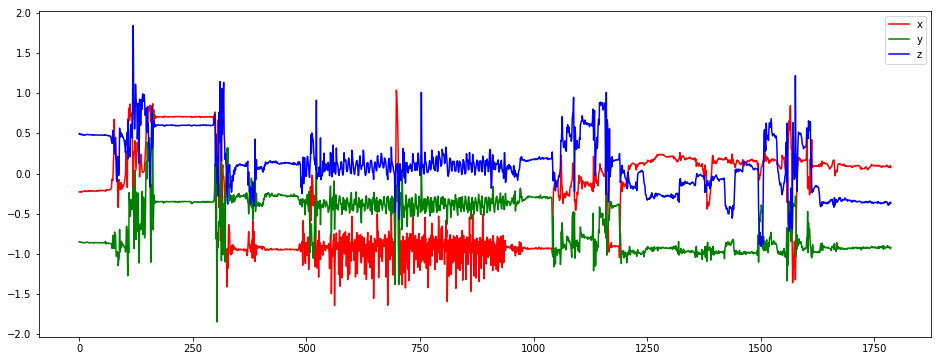

In [179]:
ts1 = [i for i in df_filt['timestamp'] if calc_sec(i[11:])<=calc_sec(ts[0][2])]
df1 = df_filt[df_filt['timestamp'].isin(ts1)]

g = 9.8
df1.loc[:,'x'] = df1['x'].apply(lambda x: x/g)
df1.loc[:,'y'] = df1['y'].apply(lambda x: x/g)
df1.loc[:,'z'] = df1['z'].apply(lambda x: x/g)

plotted = df1.plot(color=('r','g','b'),figsize=(16,6)).legend(loc='upper right')

fig = plotted.get_figure()
fig.savefig('testrun_indy_LH_acc.png')

In [180]:
H = 10
ai1 = []

for i in range(len(df1)):
    xyz_val = []
    if(i-H>=0):
        for j in range(H-1,0,-1):
            xyz_val.append([df1.iloc[i-j,1],df1.iloc[i-j,2],df1.iloc[i-j,3]])
        ai_val = float(equation_bai(xyz_val))
        ai1.append(ai_val)

In [181]:
df1['AI'] = pd.Series(ai1)

df1

,timestamp,x,y,z,AI
0,2018-12-19 16:19:23.066,-0.227327,-0.846643,0.493621,0.999979
1,2018-12-19 16:19:23.23,-0.229770,-0.846155,0.500461,0.999969
2,2018-12-19 16:19:23.392,-0.226350,-0.854461,0.491178,0.999970
3,2018-12-19 16:19:23.554,-0.225373,-0.852018,0.488735,0.999976
4,2018-12-19 16:19:23.715,-0.231236,-0.852507,0.484337,0.999972
5,2018-12-19 16:19:23.879,-0.220975,-0.854461,0.491666,0.999969
6,2018-12-19 16:19:24.04,-0.227327,-0.855438,0.482871,0.999966
7,2018-12-19 16:19:24.203,-0.223907,-0.855438,0.484337,0.999967
8,2018-12-19 16:19:24.363,-0.219509,-0.859836,0.480917,0.999969
9,2018-12-19 16:19:24.531,-0.219998,-0.856904,0.481406,0.999971


In [182]:
ts_ = []
labels = []

with open('times2.txt','r') as f:
    for line in f:
        t = line.strip('\n').split('\t')
        ts_.append(int(t[0]))
        labels.append(t[1])

accum = 0
ts = []
for x in ts_:
    accum += x
    ts.append(accum)

lb_set = set()
for x in labels:
    lb_set.add(x)

lb_ = list(lb_set)

set_cnt = []
for i in range(len(lb_)):
    set_cnt.append(0)

lb = []
lb.append('NaN')

for x in labels:
    for i in range(len(lb_)):
        if(lb_[i]==x and set_cnt[i]!=1 and lb_[i]!='NaN'):
            set_cnt[i] = 1
            lb.append(x)

colors = ['#808080', '#E6194B', '#3CB44B', '#FFE119', '#4363D8', '#F58231',
          '#911EB4', '#46F0F0', '#F032E6', '#BCF60C', '#008080', '#E6BEFF', 
          '#9A6324', '#800000', '#AAFFC3', '#808000', '#000075']

color_dict = {}
for i in range(len(lb)):
    color_dict[lb[i]] = colors[i]
    
print(color_dict)

lb_color = []
for x in labels:
    lb_color.append(color_dict[x])

print(lb_color)

{'NaN': '#808080', 'stand': '#E6194B', 'sit': '#3CB44B', 'lay down': '#FFE119', 'walk': '#4363D8'}
['#E6194B', '#3CB44B', '#E6194B', '#FFE119', '#3CB44B', '#FFE119', '#E6194B', '#808080', '#4363D8', '#4363D8', '#808080']


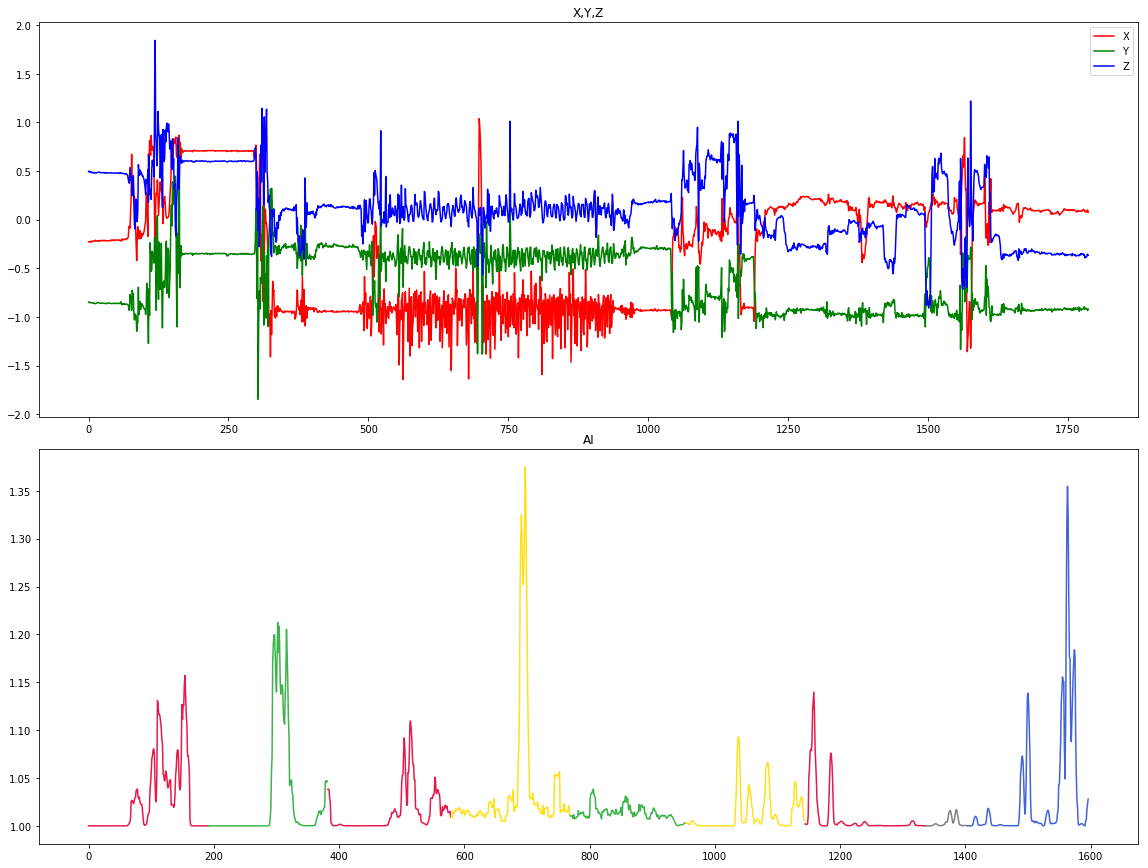

<Figure size 1080x3600 with 0 Axes>

In [183]:
dict1 = df1.to_dict(orient='list')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12))
fig.tight_layout()

ts_cnt = 0
x_axis = []
y_ai = []

ax = axes[0]
ax.plot(dict1['x'],color='r',label='X')
ax.plot(dict1['y'],color='g',label='Y')
ax.plot(dict1['z'],color='b',label='Z')
ax.legend(loc='upper right')
ax.set_title('X,Y,Z')

ax = axes[1]
for i in range(len(dict1['timestamp'])):
    if(dict1['AI'][i]>0):
        if(i>ts[ts_cnt]):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            ts_cnt += 1
            x_axis = []
            y_ai = []
        
        x_axis.append(i)
        y_ai.append(dict1['AI'][i])
    
ax.set_title('AI')
plt.figure(figsize=(15,50))
fig.savefig('testrun_indy_lh.png', dpi = 300)

plt.show()

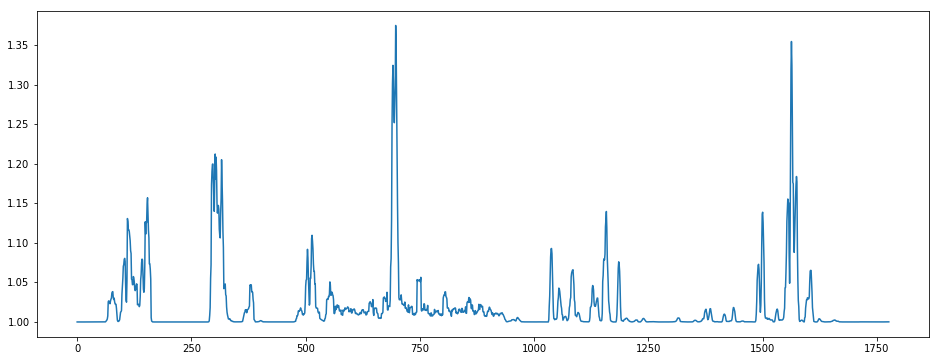

In [184]:
fig = plt.figure(figsize=(16,6))
plt.plot(ai1)
# plt.ylim(top=1.6)
plt.show()

fig.savefig('testrun_indy_LH_AI.png')

In [185]:
df1['AI'] = pd.Series(ai1)

df1.to_csv('SmartwatchData/raw_data/test_acc_indy_lh.csv')
df1

,timestamp,x,y,z,AI
0,2018-12-19 16:19:23.066,-0.227327,-0.846643,0.493621,0.999979
1,2018-12-19 16:19:23.23,-0.229770,-0.846155,0.500461,0.999969
2,2018-12-19 16:19:23.392,-0.226350,-0.854461,0.491178,0.999970
3,2018-12-19 16:19:23.554,-0.225373,-0.852018,0.488735,0.999976
4,2018-12-19 16:19:23.715,-0.231236,-0.852507,0.484337,0.999972
5,2018-12-19 16:19:23.879,-0.220975,-0.854461,0.491666,0.999969
6,2018-12-19 16:19:24.04,-0.227327,-0.855438,0.482871,0.999966
7,2018-12-19 16:19:24.203,-0.223907,-0.855438,0.484337,0.999967
8,2018-12-19 16:19:24.363,-0.219509,-0.859836,0.480917,0.999969
9,2018-12-19 16:19:24.531,-0.219998,-0.856904,0.481406,0.999971
